In [1]:
import pandas as pd
from collections import defaultdict
import missingno as mn
import datetime
import pprint
import ipyparallel as ipp
pp = pprint.PrettyPrinter()

In [2]:
df = pd.read_pickle("hydrodata_data/upper_col_data.pickle")

In [3]:
pivot = df.drop("site_id", axis=1).pivot(index=["datetime", "site_name"], columns=["variable"])

In [4]:
pivot.columns = pivot.columns.get_level_values(1)

In [5]:
meta = pd.read_csv("meta_data/simple_meta.csv", index_col=0)
meta_units = meta.loc[:, ["datatype_metadata.datatype_common_name", "datatype_metadata.unit_name"]]
units = defaultdict(set)
for i, row in meta_units.iterrows():
    name = row["datatype_metadata.datatype_common_name"]
    unit = row["datatype_metadata.unit_name"]
    units[name].add(unit)
my_units = {i:units[i].pop() for i in pivot.columns}
pp.pprint(my_units)

{'area': 'acres',
 'ave SJC inflow volume': 'acre-feet',
 'bank storage': 'acre-feet',
 'bypass release': 'cubic feet per second (cfs)',
 'bypass release volume': 'acre-feet',
 'delta storage': 'acre-feet',
 'evaporation': 'acre-feet',
 'inflow': 'cubic feet per second (cfs)',
 'inflow volume': 'acre-feet',
 'mod unregulated inflow volume': 'acre-feet',
 'pool elevation': 'feet',
 'power release': 'cubic feet per second (cfs)',
 'power release volume': 'acre-feet',
 'release volume': 'acre-feet',
 'side inflow': 'cubic feet per second (cfs)',
 'side inflow volume': 'acre-feet',
 'spillway release': 'cubic feet per second (cfs)',
 'storage': 'acre-feet',
 'total release': 'cubic feet per second (cfs)',
 'unregulated inflow': 'cubic feet per second (cfs)',
 'unregulated inflow volume': 'acre-feet'}


In [6]:
my_variables = ["bypass release", "bypass release volume", "inflow", "inflow volume", "power release", "power release volume", 
             "release volume", "spillway release", "storage", "total release"]
sdf = pivot.loc[:, my_variables]
sdf.index = sdf.index.swaplevel()
sdf = sdf.sort_index()

In [7]:
sdf

variable              bypass release  bypass release volume  inflow  \
site_name datetime                                                    
ABIQUIU   1974-01-02             NaN                    NaN     NaN   
          1974-01-03             NaN                    NaN     NaN   
          1974-01-04             NaN                    NaN     NaN   
          1974-01-05             NaN                    NaN     NaN   
          1974-01-06             NaN                    NaN     NaN   
...                              ...                    ...     ...   
WLFRESCO  2021-10-08             NaN                    NaN     NaN   
          2021-10-09             NaN                    NaN     NaN   
          2021-10-10             NaN                    NaN     NaN   
          2021-10-11             NaN                    NaN     NaN   
          2021-10-12             NaN                    NaN     NaN   

variable              inflow volume  power release  power release volume  \
site_name datetime                                                         
ABIQUIU   1974-01-02            NaN            NaN                   NaN   
          1974-01-03            NaN            NaN                   NaN   
          1974-01-04            NaN            NaN                   NaN   
          1974-01-05            NaN            NaN                   NaN   
          1974-01-06            NaN            NaN                   NaN   
...                             ...            ...                   ...   
WLFRESCO  2021-10-08            NaN            NaN                   NaN   
          2021-10-09            NaN            NaN                   NaN   
          2021-10-10            NaN            NaN                   NaN   
          2021-10-11            NaN            NaN                   NaN   
          2021-10-12            NaN            NaN                   NaN   

variable              release volume  spillway release  storage  total release  
site_name datetime                                                              
ABIQUIU   1974-01-02             NaN               NaN  39260.0            NaN  
          1974-01-03             NaN               NaN  37808.0            NaN  
          1974-01-04             NaN               NaN  36550.0            NaN  
          1974-01-05             NaN               NaN  35295.0            NaN  
          1974-01-06             NaN               NaN  34080.0            NaN  
...                              ...               ...      ...            ...  
WLFRESCO  2021-10-08             NaN               NaN  66160.0            NaN  
          2021-10-09             NaN               NaN  66208.0            NaN  
          2021-10-10             NaN               NaN  66208.0            NaN  
          2021-10-11             NaN               NaN  66172.0            NaN  
          2021-10-12             NaN               NaN  66111.0            NaN  

[1644231 rows x 10 columns]

<AxesSubplot:xlabel='variable', ylabel='variable'>

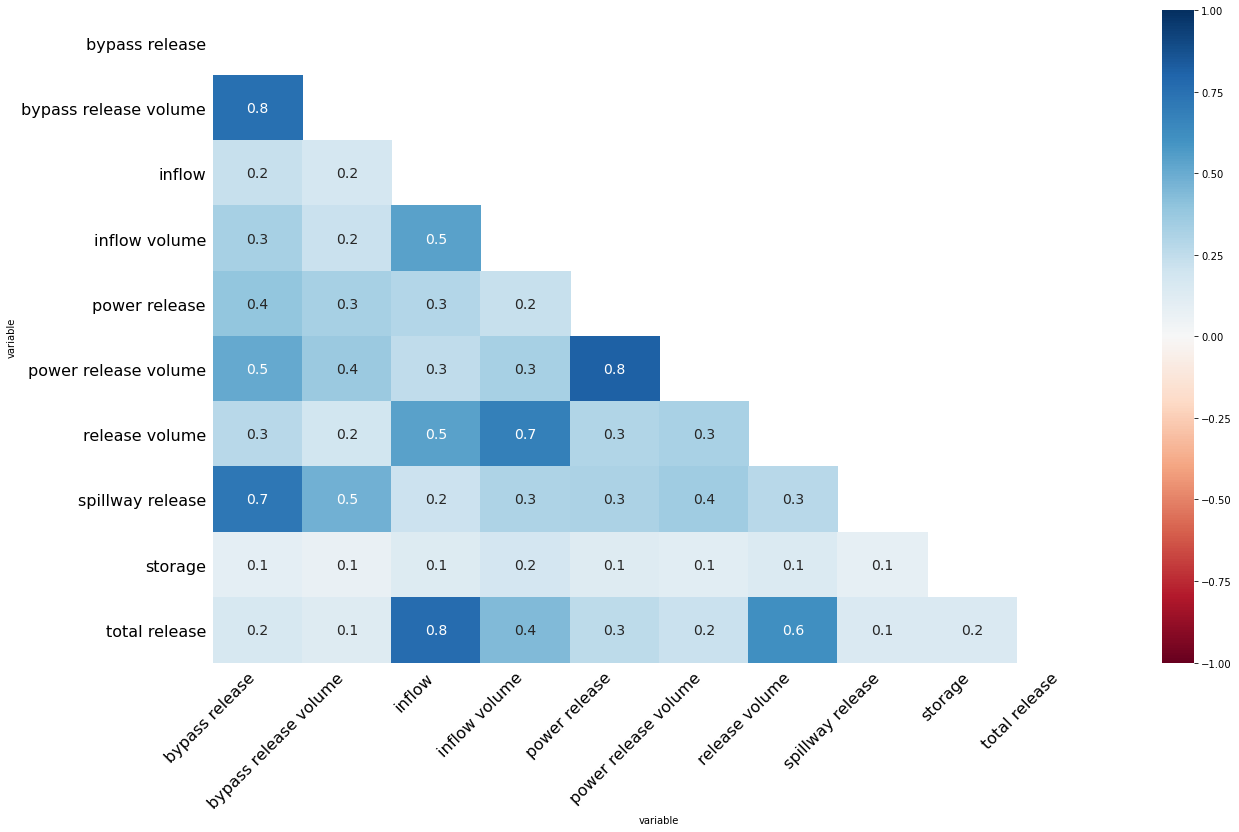

In [8]:
mn.heatmap(sdf)

In [9]:
must_haves = ["inflow", "inflow volume", "release volume", "total release", "storage"]
my_df = sdf.loc[:, must_haves]

In [10]:
my_df

variable              inflow  inflow volume  release volume  total release  \
site_name datetime                                                           
ABIQUIU   1974-01-02     NaN            NaN             NaN            NaN   
          1974-01-03     NaN            NaN             NaN            NaN   
          1974-01-04     NaN            NaN             NaN            NaN   
          1974-01-05     NaN            NaN             NaN            NaN   
          1974-01-06     NaN            NaN             NaN            NaN   
...                      ...            ...             ...            ...   
WLFRESCO  2021-10-08     NaN            NaN             NaN            NaN   
          2021-10-09     NaN            NaN             NaN            NaN   
          2021-10-10     NaN            NaN             NaN            NaN   
          2021-10-11     NaN            NaN             NaN            NaN   
          2021-10-12     NaN            NaN             NaN            NaN   

variable              storage  
site_name datetime             
ABIQUIU   1974-01-02  39260.0  
          1974-01-03  37808.0  
          1974-01-04  36550.0  
          1974-01-05  35295.0  
          1974-01-06  34080.0  
...                       ...  
WLFRESCO  2021-10-08  66160.0  
          2021-10-09  66208.0  
          2021-10-10  66208.0  
          2021-10-11  66172.0  
          2021-10-12  66111.0  

[1644231 rows x 5 columns]

In [11]:
my_df.dropna(how="all", axis=0)

variable              inflow  inflow volume  release volume  total release  \
site_name datetime                                                           
ABIQUIU   1974-01-02     NaN            NaN             NaN            NaN   
          1974-01-03     NaN            NaN             NaN            NaN   
          1974-01-04     NaN            NaN             NaN            NaN   
          1974-01-05     NaN            NaN             NaN            NaN   
          1974-01-06     NaN            NaN             NaN            NaN   
...                      ...            ...             ...            ...   
WLFRESCO  2021-10-08     NaN            NaN             NaN            NaN   
          2021-10-09     NaN            NaN             NaN            NaN   
          2021-10-10     NaN            NaN             NaN            NaN   
          2021-10-11     NaN            NaN             NaN            NaN   
          2021-10-12     NaN            NaN             NaN            NaN   

variable              storage  
site_name datetime             
ABIQUIU   1974-01-02  39260.0  
          1974-01-03  37808.0  
          1974-01-04  36550.0  
          1974-01-05  35295.0  
          1974-01-06  34080.0  
...                       ...  
WLFRESCO  2021-10-08  66160.0  
          2021-10-09  66208.0  
          2021-10-10  66208.0  
          2021-10-11  66172.0  
          2021-10-12  66111.0  

[1476388 rows x 5 columns]

In [12]:
idx = pd.IndexSlice
inflow_poss = ["inflow", "inflow volume"]
release_poss = ["total release", "release volume"]
reservoirs = my_df.index.get_level_values(0).unique()

In [13]:
i = 0
all_series_res = []
for res in reservoirs:
    res_df = my_df.loc[idx[res, :]].dropna(how="all", axis=1).dropna()
    inflow_status = False
    release_status = False
    storage_status = False
    for col in res_df.columns:
        if col in inflow_poss:
            inflow_status = True
        if col in release_poss:
            release_status = True
        if col == "storage":
            storage_status = True
    if inflow_status and release_status and storage_status:
        all_series_res.append(res)
    shape = res_df.shape
    #rint(f"Reservoir {res} has shape {shape}")
    #rint(f"Inflow: {inflow_status}, Release: {release_status}, Storage: {storage_status}")
    i += 1
print(f"NRes = {i}")
print(f"NRes all series = {len(all_series_res)}")

NRes = 91
NRes all series = 58


In [14]:
ardf = pd.DataFrame()
for res in all_series_res:
    res_df = my_df.loc[idx[res, :],:].dropna(how="all", axis=1)
    ardf = res_df if ardf.empty else ardf.append(res_df)
    

In [15]:
inflow = ardf.loc[:, ["inflow", "inflow volume"]].dropna(how="all")
release = ardf.loc[:, ["release volume", "total release"]].dropna(how="all")
storage = ardf.loc[:, ["storage"]].dropna()
tdf = inflow.join([release, storage])

In [71]:
tdf

variable                   inflow  inflow volume  release volume  \
site_name   datetime                                               
BIG SANDY   1974-05-31  623.21250     1236.12397       345.12397   
            1974-06-30 -696.58333    -1381.65290       678.34711   
            1974-07-31   33.17083       65.79339       384.79339   
            1974-08-31  276.98750      549.39669       432.39669   
            1975-05-30 -205.38750     -407.38017        45.61983   
...                           ...            ...             ...   
WILLARD BAY 2021-09-26 -433.58333     -860.00000        30.00000   
            2021-09-27 -433.07917     -859.00000        30.00000   
            2021-09-28 -402.32500     -798.00000        38.00000   
            2021-09-29 -348.88333     -692.00000        38.00000   
            2021-09-30 -269.22500     -534.00000        38.00000   

variable                total release  storage  
site_name   datetime                            
BIG SANDY   1974-05-31      174.00000  36281.0  
            1974-06-30      342.00000  36277.0  
            1974-07-31      194.00000  32527.0  
            1974-08-31      218.00000  20865.0  
            1975-05-30       23.00000  29471.0  
...                               ...      ...  
WILLARD BAY 2021-09-26       15.12500  77695.0  
            2021-09-27       15.12500  76806.0  
            2021-09-28       19.15833  75970.0  
            2021-09-29       19.15833  75240.0  
            2021-09-30       19.15833  74668.0  

[731795 rows x 5 columns]

In [16]:
tdfp = tdf[tdf["inflow"] >= 0]
tdfp.index = pd.MultiIndex.from_arrays([tdfp.index.get_level_values(0), pd.to_datetime(tdfp.index.get_level_values(1))])

In [17]:
spans = {}
for res in tdfp.index.get_level_values(0).unique():
    res_df = tdfp.loc[idx[res,:],:]
    res_df = res_df.reset_index()
    #res_df["datetime"] = pd.to_datetime(res_df["datetime"])
    res_df.loc[res_df["datetime"] - datetime.timedelta(days=1) == res_df["datetime"].shift(), "mask"] = 0
    res_df["mask"] = res_df["mask"].cumsum()
    span = res_df.loc[res_df["mask"] == res_df["mask"].value_counts().idxmax(), "datetime"]
    span_start = span.min()
    span_end = span.max()
    spans[res] = (span_start, span_end)
    #means = res_df.mean()
    #std = res_df.std()
    #print(f"Res {res} longest span = {span_start} to {span_end}")

In [31]:
def get_metrics(res, tdfp, span):
    metrics = {}
    res_df = tdfp.loc[
        (tdfp.index >= span[0]) & (tdfp.index <= span[1])
        ,:
    ]
    counts = res_df.count()
    inflow_var = counts[["inflow", "inflow volume"]].idxmax()
    release_var = counts[["release volume", "total release"]].idxmax()
    means = res_df.mean().to_dict()
    std = res_df.std().to_dict()
    # use the one with more data
    if inflow_var == "inflow":
        inflow_mean = means["inflow"] * 60 * 60 * 24 / 43560 # go from cfs to acre feet/day
    else:
        inflow_mean = means["inflow volume"] # already in acre feet / day
    rt = means["storage"] / inflow_mean # will be in days
    metrics[res] = {
        "means":means,"std":std,
        "rt_day":rt,"inflow_var":inflow_var,
        "release_var":release_var
    }
    return metrics


In [32]:
cluster = ipp.Client()
view = cluster.load_balanced_view()

In [33]:
idx = pd.IndexSlice
results = []
for res in tdfp.index.get_level_values(0).unique():
    ar = view.apply_async(get_metrics, res, tdfp.loc[idx[res,:]], spans[res])
    results.append(ar)

cluster.wait(results)

True

In [44]:
metrics = {}
for i in results:
    for j, k in i.result().items():
        metrics[j] = k

In [52]:
for res, (ss, se) in spans.items():
    metrics[res]["span_start"] = ss.strftime("%Y-%m-%d")
    metrics[res]["span_end"] = se.strftime("%Y-%m-%d")

In [53]:
import json
with open("res_metrics.json", "w") as f:
    json.dump(metrics, f)    

In [55]:
tdfp.to_pickle("hydrodata_data/trimmed_upper_col_data.pickle")